Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout
from sklearn.metrics import confusion_matrix
import seaborn as sns

np.random.seed(0)


Data

In [2]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
print(x_test.shape, y_test.shape)
print(x_train.shape, y_train.shape)

(10000, 28, 28) (10000,)
(60000, 28, 28) (60000,)


Visualize Examples

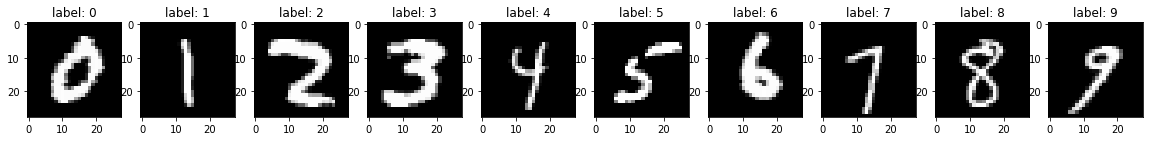

In [4]:
num_classes = 10
f, ax = plt.subplots(1, num_classes, figsize=(20,20))

for i in range(0,num_classes):
  sample = x_train[y_train == i][3]
  ax[i].imshow(sample, cmap='gray')
  ax[i].set_title('label: {}'.format(i, fontsize = 16))


In [5]:
# cant feed the network y as number so we use one hot encoders (continuous)
y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
y_test = keras.utils.np_utils.to_categorical(y_test, num_classes) 

In [6]:
print(y_train[1])

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


# prepare data

In [7]:
# Normalization (X - Xmin / Xmax - Xmin)
min_train = np.min(x_train)
max_train = np.max(x_train)
x_train = (x_train - min_train) / (max_train - min_train)

min_test = np.min(x_test)
max_test = np.max(x_test)
x_test = (x_test - min_test) / (max_test - min_test)


In [8]:
# Reshape Data we want tp flatten the matrix with the -1
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

Create new model - fully connected neural networks

In [10]:
model = Sequential()

model.add(Dense (units = 128, input_shape= (784,), activation = 'relu' ))
model.add(Dense (units= 128, activation = 'relu'))
model.add(Dropout(0.25)) # 25% of nuerons will be deactivated to prevent overfitting
model.add(Dense (units= 10, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])


In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 128)               100480    
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________





#Train




In [13]:
batch_size = 512
epochs = 10
model.fit(x=x_train, y=y_train, batch_size= batch_size, epochs = epochs)

Epoch 1/10
118/118 [==============================] - 2s 11ms/step - loss: 0.5982 - accuracy: 0.8268
Epoch 2/10
118/118 [==============================] - 1s 11ms/step - loss: 0.2300 - accuracy: 0.9340
Epoch 3/10
118/118 [==============================] - 1s 11ms/step - loss: 0.1657 - accuracy: 0.9520
Epoch 4/10
118/118 [==============================] - 1s 11ms/step - loss: 0.1321 - accuracy: 0.9615
Epoch 5/10
118/118 [==============================] - 1s 10ms/step - loss: 0.1111 - accuracy: 0.9670
Epoch 6/10
118/118 [==============================] - 1s 11ms/step - loss: 0.0916 - accuracy: 0.9724
Epoch 7/10
118/118 [==============================] - 1s 11ms/step - loss: 0.0780 - accuracy: 0.9765
Epoch 8/10
118/118 [==============================] - 1s 11ms/step - loss: 0.0693 - accuracy: 0.9790
Epoch 9/10
118/118 [==============================] - 1s 11ms/step - loss: 0.0613 - accuracy: 0.9817
Epoch 10/10
118/118 [==============================] - 1s 11ms/step - loss: 0.0544 - accura

#Evaluate

In [14]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('test loss: {}, test accuracy: {}'.format(test_loss, test_acc) )

313/313 [==============================] - 1s 2ms/step - loss: 0.0788 - accuracy: 0.9765
test loss: 0.07876761257648468, test accuracy: 0.9764999747276306


In [15]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
print(y_pred)
print(y_pred_classes)

[[1.00480133e-06 8.64685774e-07 2.73784935e-05 ... 9.99870062e-01
  4.13736529e-07 5.86973965e-06]
 [1.29408065e-07 6.22813997e-04 9.99310851e-01 ... 3.34405503e-09
  6.04254456e-06 6.18585627e-10]
 [1.72624482e-06 9.98916864e-01 8.51906225e-05 ... 6.73011935e-04
  4.71602034e-05 2.19970207e-06]
 ...
 [1.74161935e-10 2.90304101e-08 1.29598346e-10 ... 3.64287916e-06
  1.38658507e-07 5.35899460e-07]
 [5.65394220e-09 1.14352005e-07 1.62940647e-10 ... 1.72138517e-08
  4.81611714e-05 1.86203177e-08]
 [1.88707023e-08 3.11637549e-10 4.14126555e-09 ... 5.63400845e-12
  3.03232800e-10 5.07218212e-10]]
[7 2 1 ... 4 5 6]


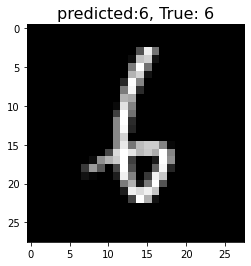

In [16]:
#evaluate one example
random_idx = np.random.choice(len(x_test))
x_sample = x_test[random_idx]
y_true = np.argmax(y_test, axis=1)
y_sample_true = y_true[random_idx]
y_sample_pred_class = y_pred_classes[random_idx]

plt.title('predicted:{}, True: {}'.format(y_sample_pred_class, y_sample_true), fontsize=16)
plt.imshow(x_sample.reshape(28,28), cmap='gray')

#confusion matrix

Text(0.5, 1.0, 'confusion matrix')

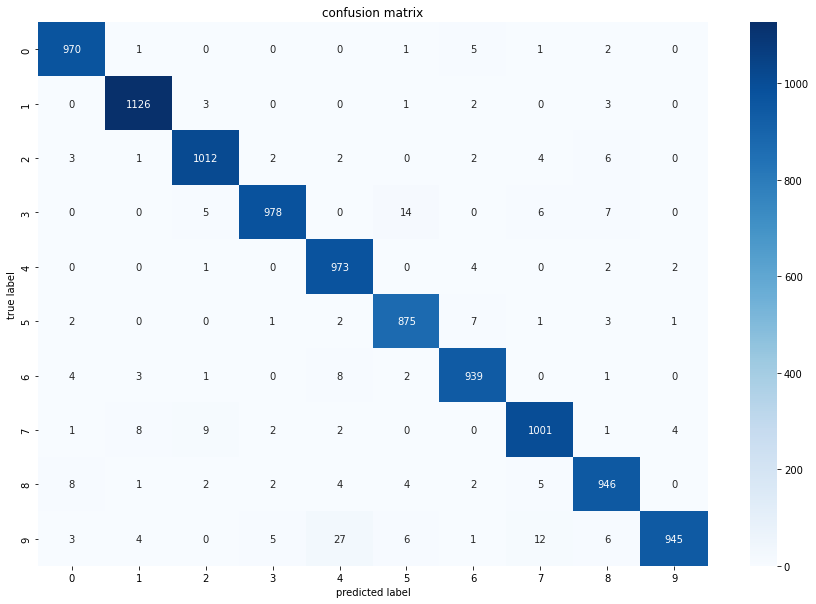

In [19]:
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

#plot
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(confusion_mtx, annot = True, fmt = 'd', ax=ax,cmap = 'Blues')
ax.set_xlabel('predicted label')
ax.set_ylabel('true label')
ax.set_title('confusion matrix')

# investigate errors

In [21]:
errors = (y_pred_classes - y_true != 0)
y_pred_classes_errors = y_pred_classes[errors]
y_pred_errors = y_pred[errors]
y_true_errors = y_true[errors]
x_test_errors = x_test[errors]

In [23]:
y_pred_errors_probability = np.max(y_pred_errors, axis=1)
true_probability_errors = np.diagonal(np.take(y_pred_errors,y_true_errors, axis=1))
diff_errors_pred_true = y_pred_errors_probability - true_probability_errors

#get list of indices of sorted diff
sorted_idx_diff_errors= np.argsort(diff_errors_pred_true)
top_idx_diff_errors = sorted_idx_diff_errors[-5:] #5 last ones

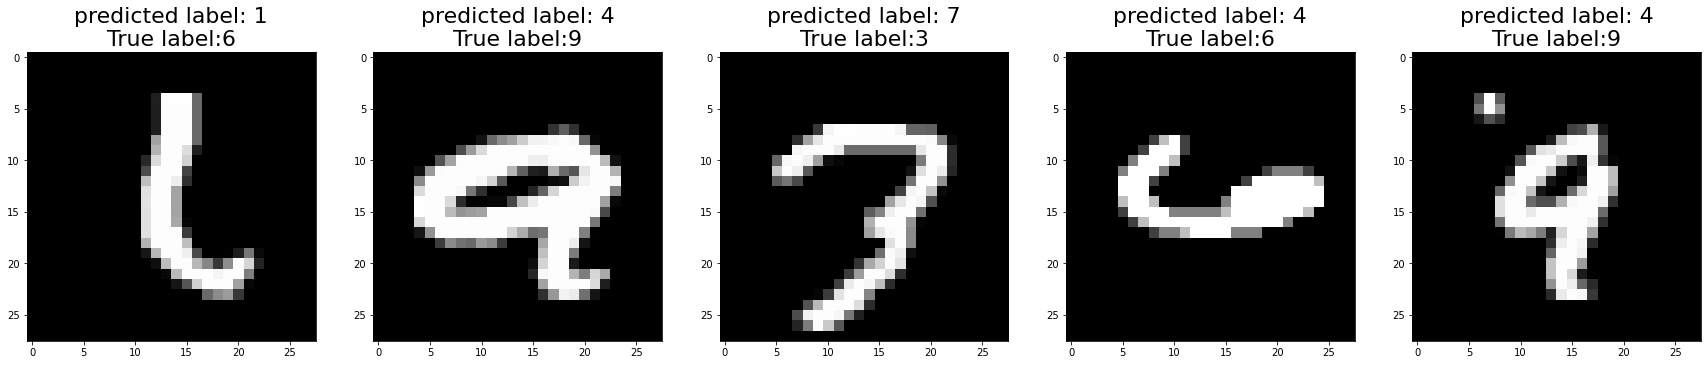

In [27]:
#show top errors
num = len(top_idx_diff_errors)
f, ax = plt.subplots(1,num,figsize = (30,30))

for i in range(0,num):
  idx = top_idx_diff_errors[i]
  sample = x_test_errors[idx].reshape(28,28)
  y_t = y_true_errors[idx]
  y_p = y_pred_classes_errors[idx]
  ax[i].imshow(sample,cmap='gray')
  ax[i].set_title('predicted label: {}\nTrue label:{}'.format(y_p,y_t), fontsize = 22)